
# Project: Investigate 'The Movie Database' (TMDb) movie data

## Table of Contents

- [Introduction](#intro)
- [Data Collection and Wrangling](#wrangling)
  - [Cleaning Accented Characters](#cleaning)
  - [Nulls, Zeros and Missing Data](#othercleaning)
- [Exploratory Data Analysis](#eda)
  - [Statistics and Visualizations](#statistics)
      - [Q1: Which genres are most popular from year to year?](#Q1)
      - [Q2: What kinds of properties are associated with movies that have high revenues?](#Q2)
      - [Q3: Does the release date impact movie revenues?](#Q3)
  - [Fun Trivia](#trivia)
      - [Which actors have appeared in the most blockbuster films?](#F1)
      - [Which actors have generated the highest revenues?](#F2)
      - [Which directors' movies have generated the highest revenues](#F3) 
      - [Which production companies have generated the highest revenues?](#F4)
- [Conclusions](#conclusions)
- [References](#references)

<a id='intro'></a>
## Introduction

> **I chose to work on The Movie Database dataset.  I have focused on the suggested questions: Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?**

> **Additionally I chose to determine the relationship between movie release date (season, time of the year) and its impact on revenue.  I also enjoy movie trivia so at the end of my project I decided to query the data in an attempt to answer a few fun trivia questions regarding actors, directors, and production companies and which were near the top with respect to high revenue producing films.**


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Collection and Wrangling

>**In this section of the report I loaded the data, checked for cleanliness, and then took steps to trim and clean the dataset for analysis. Details are documented in sections below.**


### General Properties

> **The first thing I did was perform a visual inspection of the data.  I opened the file to ensure it was comma delimited as opposed to some other type of text file.  I looked for things like proper delimiting of fields, garbage characters, obvious truncated records, etc.**

> **Next I read in the file and used head() to view a subset of records.**

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_mov = pd.read_csv('tmdb-movies.csv')
df_mov.head(5)




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>** I then output the column names to ensure that there was consistent naming and that the column names were self-describing. I did not determine that any names necessarily required change.  I executed a shape() command to determine the size of the data in rows and columns followed by the info() command to get a sense of the number of missing values and data types.**

In [3]:
df_mov.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df_mov.shape

(10866, 21)

In [5]:
#view to check names
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>**Here I used describe() on the data to learn the range of data observations and to gather some basic descriptive statistics**

In [6]:
print(df_mov.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129


<a id='wrangling'></a>
## Data Cleaning

>** In this section I begin preparing the data for analysis. From the steps above I determined that there were 10866 records. Based on visual inspection and the steps above I also determined that the cast, director, genres, and production company field values were missing from some rows.  In the rows that were populated the field contained multiple values in a single field separated by the '|' (pipe) character. Each of these items is coved below.**

<a id='othercleaning'></a>
### Nulls, Zeros and Missing Data

>**Here I determined the numbers associated with the missing cast, director, genres and production company values.**

In [7]:
print('# of missing cast values:',df_mov.iloc[:, np.r_[0, 6]].isnull().values.sum())
print('# of missing director values:', df_mov.iloc[:, np.r_[0, 6]].isnull().values.sum())
print('# of missing genres values:', df_mov.iloc[:, np.r_[0, 13]].isnull().values.sum())
print('# of missing production company values:', df_mov.iloc[:, np.r_[0, 14]].isnull().values.sum())

# of missing cast values: 76
# of missing director values: 76
# of missing genres values: 23
# of missing production company values: 1030


>**I decided to infuse these missing values with a value that would indicate that they were empty.  I chose to use the string 'NO_DATA'.  My reasoning here is that I can later group these items together when gathering group statistics and provide corresponding statistics for this group as well.** 

In [8]:
#fill the nulls in cast, director, production_companies, genres with '[NO_DATA]' so 
#movies with no data can be grouped and categoriezed later
df_mov['cast'].fillna('NO_DATA',inplace=True)
df_mov['director'].fillna('NO_DATA',inplace=True)
df_mov['production_companies'].fillna('NO_DATA',inplace=True)
df_mov['genres'].fillna('NO_DATA',inplace=True)


>** Lets execute info() again to ensure the colums are no longer null  ** 

In [9]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                2936 non-null object
director                10866 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              

>** Based on visual inspection and output from the describe() method which provided the minimum end of the range, I was able to learn that the budget, revenue, budget_adj, revenue_adj and runtime fields do not have null values but they do contain essentially missing values in the form of '0' values.  Inspection of the data indicates that a large number of the financial columns are populated with '0' and the runtime column includes zeros and other values which appear to be in error. Let's take a closer look.**

In [10]:
zeros_r=df_mov['runtime'] == 0
zeros_r.sum()

31

In [11]:
zeros_30less=df_mov['runtime'] < 30
zeros_30less.sum()

231

>** There are 31 movies where the runtime value is zero and 231 where the runtime is less than 30 minutes.  I suspect that many of these runtimes are in error, but since we can only be certain of the ones with zero value (because a movie has to have some duration) we will infuse the zero value items with the mean and ignore the rest.**

In [12]:
run_gtr_zero=df_mov['runtime']>0
run_gtr_zero.mean()

0.99714706423706978

In [13]:
runtime_mean=0.99714706423706978

>**Infuse the 31 movies where the runtime is zero with the mean of the rows with a non-zero value for runtime.**

In [14]:
df_mov=df_mov.replace({'runtime': {0: runtime_mean}}) 

>**Now, let's check the adjusted budget column and determine how many records have 0 value**

In [15]:
zeros_b=df_mov['budget_adj'] == 0
zeros_b.sum()

5696

>** Let's check the adjusted budget column and determine how many records have a value GREATER THAN 0**

In [16]:
zeros_b=df_mov['budget_adj']>0
zeros_b.sum()

5170

>** Wow, over half the records have 0 values and its about the same for budget, revenue, and adjusted revenue.  This is too many records to delete or to just ignore.  Do so will reduce our sample size or skew our data.  Our best option is to infuse the data with a value.  Based on what we have learned thus far in the course we have a chose to infuse the date with the 'mean' or the 'median'.  Let's test each option and determine which option is best.**

In [17]:
df_mov['budget_adj'].mean()


17551039.82288678

>**^---This is the mean of the adjusted budget INCLUDING THE ROWS WITH ZERO VALUES , it matches what we saw in the describe() results above**

In [18]:
x=df_mov.loc[df_mov['budget_adj']>0]
x['budget_adj'].mean()

36887736.695452176

>**^---This is the mean of the adjusted budget EXCLUDING THE ROWS WITH ZERO VALUES, this mean value is significantly higher now that the zeroes have been excluded.**

>** Now let's check the median of these two sets, those with 0 and those with values greater than zero...**

In [19]:
x=df_mov.loc[df_mov['budget_adj']==0]
x['budget_adj'].median()

0.0

>**^---This is the median of the adjusted budget INCLUDING ZERO VALUE ROWS.  It represents the MIDDLE value and since more that half of the rows have 0 as the value in the adjusted budget field then the median is actually 0**

In [20]:
x=df_mov.loc[df_mov['budget_adj']>0]
x['budget_adj'].median()

22722708.52476925

>**^---This is the median of the adjusted budget EXCLUDING ZERO VALUE ROWS**

>** Let's look at this visually, here I create two groups those with zero as the value and those with values greater than zero...then we plot them as side-by-side histograms to see their distributions.  I also plot them with a bloxplot to show their distribution and highlight the outliers. **

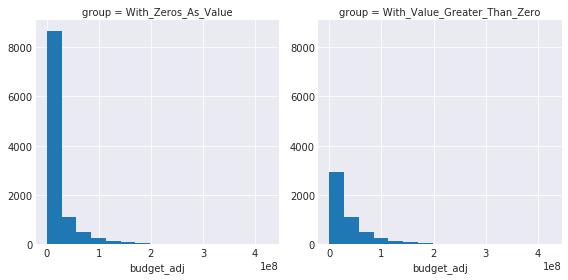

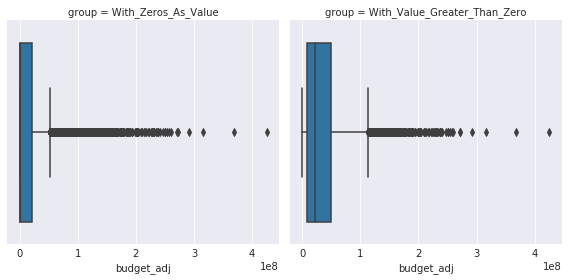

In [24]:
sns.set_style("darkgrid")
x=pd.DataFrame(df_mov['budget_adj'])

y=df_mov.loc[df_mov['budget_adj']>0]
y=pd.DataFrame(y['budget_adj'])

x['group'] = 'With_Zeros_As_Value'
y['group'] = 'With_Value_Greater_Than_Zero'

cdf = pd.concat([x, y]) 

g = sns.FacetGrid(cdf, col="group", size=4)
g.map(plt.hist, "budget_adj", bins=15);

h = sns.FacetGrid(cdf, col="group", size=4)
h.map(sns.boxplot, "budget_adj" ,order='budget_adj');


>** We can see the high bar at zero in the histogram where all the values pile up, we can also see that there are a lot outliers**


>**That was for adjusted budget, lets repeat the same steps for the adjusted revenue...**

In [25]:
zeros_b=df_mov['revenue_adj'] == 0
zeros_b.sum()

6016

>** ^---this is how many records have a value of 0**

In [26]:
zeros_b=df_mov['revenue_adj']>0
zeros_b.sum()

4850

>**^---this is how many records have a value greater than 0, over 55%**

In [27]:
df_mov['revenue_adj'].mean()

51364363.253250986

>**^---this is the mean INCLUDING THE ZERO VALUES, matches the describe() output above**

In [28]:
x=df_mov.loc[df_mov['revenue_adj']>0]
x['revenue_adj'].mean()

115077354.86800517

>**^---this is the mean EXCLUDING THE ROWS WITH VALUES GREATER THAN ZERO**

In [29]:
x=df_mov.loc[df_mov['revenue_adj']==0]
x['revenue_adj'].median()

0.0

>**^---this is the median INCLUDING THE ROWS WITH ZERO VALUES**

In [31]:
x=df_mov.loc[df_mov['revenue_adj']>0]
x['revenue_adj'].median()

43927485.5442142

>**^---this is the median EXCLUDING THE ROWS WITH VALUES GREATER THAN ZERO**

>**Let's compare ** REVENUE** histograms with zeroes included in the data and without**

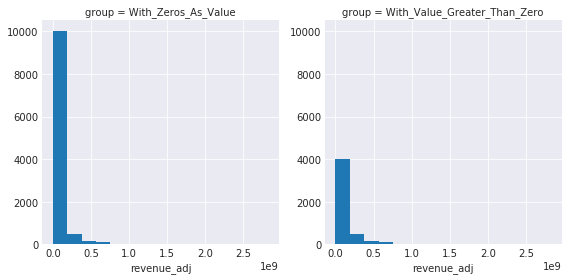

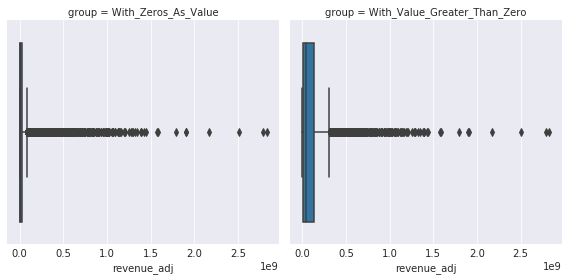

In [32]:
sns.set_style("darkgrid")
x=pd.DataFrame(df_mov['revenue_adj'])

y=df_mov.loc[df_mov['revenue_adj']>0]
y=pd.DataFrame(y['revenue_adj'])

x['group'] = 'With_Zeros_As_Value'
y['group'] = 'With_Value_Greater_Than_Zero'

cdf = pd.concat([x, y]) 

g = sns.FacetGrid(cdf, col="group", size=4)
g.map(plt.hist, "revenue_adj", bins=15);


h = sns.FacetGrid(cdf, col="group", size=4)
h.map(sns.boxplot, "revenue_adj",order='revenue_adj');

>**Very similar to what we saw above with the adjusted budget**

>**Now let's see what the budget data would look like if we imputed a value, substituting it for zero.  We will look at the distribution if we imputed the **Mean** and how it would look if we imputed the **Median** **

>**To do this we'll make copies of the data set and first infuse using the **MEAN** and then we'll infuse a copy using the **MEDIAN**, after that we'll decide which to use and infuse the actual dataset**

In [33]:
budget_adj_mean=36887736.69545232
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'budget_adj': {0: budget_adj_mean}}) 

>** Let's replace the zero values in the budget_adj column with the MEAN**

In [34]:
zeros_b=df_mov_copy['budget_adj'] == 0
zeros_b.sum()

0

>**^---Let's make sure it worked, there should be no zero values in the budget_adj column now...and thats what we got**

In [35]:
zeros_b=df_mov_copy['budget_adj']>0
zeros_b.sum()

10866

>**^---All 10866 rows should have a value greater than zero...and they do**

In [36]:
df_mov_copy['budget_adj'].mean()

36887736.695452251

>**^---and we check the mean**


>**Now We will look at the distribution if we imputed the **Median**...**

In [37]:
budget_adj_median = 22722708.52476925
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'budget_adj': {0: budget_adj_median}}) 

>** Let's replace the zero values in the budget_adj column with the MEDIAN**

In [38]:
zeros_b=df_mov_copy['budget_adj'] == 0
zeros_b.sum()

0

In [39]:
zeros_b=df_mov_copy['budget_adj']>0
zeros_b.sum()

10866

>**^---We should have zero rows with zero values in the budget_adj column and all 10866 should now have non-zero values...and we do**

In [40]:
df_mov_copy['budget_adj'].median()

22722708.52476925

>**^---Let's check the median **


>**and now we plot a copy of data with adjusted budget infused with the **MEAN** and a copy infused with the **MEDIAN: ** side-by-side**

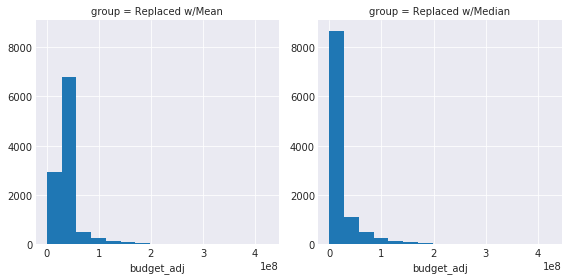

In [41]:
sns.set_style("darkgrid")

budget_adj_mean= 36887736.69545232
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'budget_adj': {0: budget_adj_mean}}) 
x=pd.DataFrame(df_mov_copy['budget_adj'])

budget_adj_median = 22722708.52476925
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'budget_adj': {0: budget_adj_median}})
y=pd.DataFrame(df_mov_copy['budget_adj'])

x['group'] = 'Replaced w/Mean'
y['group'] = 'Replaced w/Median'

cdf = pd.concat([x, y]) 

g = sns.FacetGrid(cdf, col="group", size=4)
g.map(plt.hist, "budget_adj", bins=15);



>**and now we plot a copy of data with adjusted revenues infused with the **MEAN** and a copy infused with the **MEDIAN** side-by-side**

In [42]:
revenue_adj_mean=115077354.86800507
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'revenue_adj': {0: revenue_adj_mean}})

>**^---Replace this copy with the mean**

In [43]:
zeros_r=df_mov_copy['revenue_adj'] == 0
zeros_r.sum()

0

>**^---Verify that no rows with zero as their value of of adjusted revenue still exist**

In [44]:
revenue_adj_median = 43927485.5442142
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'revenue_adj': {0: revenue_adj_median}})

>**^---Replace this copy with the median**

In [45]:
zeros_r=df_mov_copy['revenue_adj'] > 0
zeros_r.sum()

10866

>**^---Verify all rows have values greater than zero**

>** We've done the replace, now let's plot and replace the zero values in the budget_adj column with the MEDIAN**

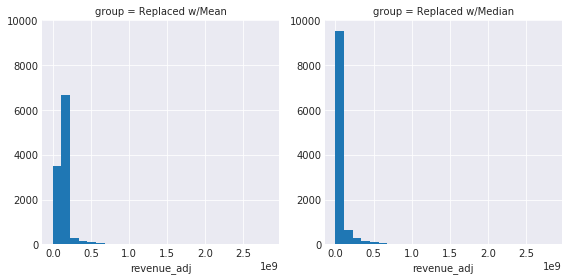

In [46]:
sns.set_style("darkgrid")

revenue_adj_mean= 115077354.86800507
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'revenue_adj': {0: revenue_adj_mean}}) 
x=pd.DataFrame(df_mov_copy['revenue_adj'])

revenue_adj_median = 43927485.5442142
df_mov_copy=df_mov.copy()
df_mov_copy=df_mov_copy.replace({'revenue_adj': {0: revenue_adj_median}})
y=pd.DataFrame(df_mov_copy['revenue_adj'])

x['group'] = 'Replaced w/Mean'
y['group'] = 'Replaced w/Median'

cdf = pd.concat([x, y]) 

g = sns.FacetGrid(cdf, col="group", size=4)
g.map(plt.hist, "revenue_adj", bins=25);

>**After trying several different bin-sizes to compare the distribution across a different number of bin buckets, I think the better option is to replace with the median, let's replace them in the main dataframe and continue**

In [47]:
budget_adj_median = 22722708.52476925
budget_adj_mean= 36887736.69545232
revenue_adj_mean= 115077354.86800507
revenue_adj_median = 43927485.5442142

df_mov=df_mov.replace({'budget_adj': {0: budget_adj_median}})
df_mov=df_mov.replace({'revenue_adj': {0: revenue_adj_median}})

>** Now lets trim some fields.  The 'budget_adj' and 'revenue_adj' have been adjusted to normalize dollar amounts adjusted for inflation.  It's best to use the adjusted values to make more realistic comparisons rather than use the unadjusted 'budget' and 'revenue' fields so we will drop these.  I will not use 'imdb_id', 'homepage', 'tagline','keywords', or 'overview' fields in my analysis so I will drop these as well. ** 

In [48]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#lets drop: imdb_id, homepage, tagline, keywords, overview

df_mov.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline','keywords','overview'], axis=1, inplace=True)

>**Let's check the data types and ensure the columns have been removed: **

In [49]:
df_mov.dtypes


id                        int64
popularity              float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='cleaning'></a>
### Cleaning Accented Characters

>** During the visual inspection of the data I noticed that there we a number of what appeared to be garble characters in some of the cast and director names.  The pattern associated with the characters consisted of an 'Ã' followed by some other character.  A search of the actor names yielded the correct spelling of the name and it became obvious that the issue was associated with the encoding of accented character frequently followed in Latin names.  I decided to search for the 'Ã' character and re-encode the offend names.**

>**Another part of my approach was to split the cast, director, genres, and production company fields into separate rows (and ultimately persisted as separate files) that I could join with the other movie data to yield separate rows.  This would make it possible to group, count and apply statistics to these as categories of data.**

>** the following function was originally created to split a column of data (cast, director, genres, or production company) based on the pipe delimiter an return a two-column dataframe that containing the original movie identifier and the parse name in separate rows.  The movie identifier is necessary in order to have a common field by which to join the dataset with the primary movie data later. **

>** Since this code is already accessing each of the values in cast, director, genres, and production company I decided to insert the code to search for and replace the offending characters into this function.**

>**NOTE:  It was not until after I had begun this cleanup effort that I re-read the assignment overview that stated that these characters could be ignored.  Since I had already begun I decided to keep this as part of my report as an additional example of data cleanup.**

In [50]:
# This function was originally created to split a column of data 
# (cast, director, genres, or production company) based on the pipe 
# delimiter and return a two-column dataframe containing the original 
# movie identifier and then parse the name into separate rows.  
# The movie identifier is necessary in order to have a common field 
# by which to join the dataset with the primary movie data later

def split_to_rows(df, column, sep='|', keep=False):

    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)

            #the data has bad values associated with accented characters due to poor encoding
            #this code will fix most of them by re-encoding them
            if ('Ã' in value):
                original = value
                encoded1 = bytes(original, 'Windows-1252')
            
                try:
                    encoded2 = str(encoded1, 'utf-8')
                    value=encoded2
                    new_values.append(value)
                    break
                except UnicodeDecodeError:
                    #dont know how it's encoded, this fixed most of them, so...
                    #just save the original and fix the rest individually
                    #print(original) #print the original name so we have a list of remaining offenders
                    new_values.append(original)            
                   
            else:
                value=value.replace('"', '')
                new_values.append(value)
    
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

>**Lets start by splitting and cleaning the cast column**

In [51]:
#lets get the two clumns we care about, id and cast
df_castr = df_mov.loc[:, ['id','cast']]

In [52]:
#split the cast list of actors into seperate rows
df_cast2 = split_to_rows(df_castr,'cast','|', False)


>**Lets check and see if we fixed them all... we'll search for the identifying 'Ã' character and see if any are left**

In [53]:
df_find=df_cast2[df_cast2.cast.str.contains('Ã',flags=0,regex=True)]
df_find

,id,cast
919,193726,Miguel Ãngel MuÃ±oz
6358,9927,Luis Ãvalos
7330,21629,Miguel Ãngel SuÃ¡rez
7686,13283,Miguel Ãngel Valera
7759,14793,Hildur ÃrsÃ¦lsdÃ³ttir
9572,28452,Santiago Ãlvarez


>**My function fixed many of them but a few still remain
Luis Ãvalos, Miguel Ãngel Valera and Santiago Ãlvarez have only the 'Ã' as a single char
and do not need repair.  The remaining offending items have the 'Ã' followed by an additional character
like 'Ã±','Ã¡', 'Ã¦' or 'Ã³' so we will fix these manually based on an internet search of the correct name**

In [54]:
df_cast2.loc[df_cast2.cast == 'Miguel Ãngel MuÃ±oz', 'cast'] = 'Miguel Ángel Muñoz'
df_cast2.loc[df_cast2.cast == 'Miguel Ãngel SuÃ¡rez', 'cast'] = 'Miguel Ángel Suárez'
df_cast2.loc[df_cast2.cast == 'Hildur ÃrsÃ¦lsdÃ³ttir', 'cast'] = 'Hildur Ársælsdóttir'


>**We check one more time and should only have these three, all the rest of the accented chars in cast names have been fix:      
6358   9927          Luis Ãvalos  
7686  13283  Miguel Ãngel Valera  
9572  28452     Santiago Ãlvarez  **

In [55]:
df_find=df_cast2[df_cast2.cast.str.contains('Ã',flags=0,regex=True)]
df_find

,id,cast
6358,9927,Luis Ãvalos
7686,13283,Miguel Ãngel Valera
9572,28452,Santiago Ãlvarez


>** Now I repeat these same series of steps to cleanup names in the director, genres, and production company fields.  There are no offending characters in the genre or production_companies field but we still want to split the values**

In [56]:
df_direct = df_mov.loc[:, ['id','director']]
df_direct2 =split_to_rows(df_direct,'director','|', False)

In [57]:
df_find=df_direct2[df_direct2.director.str.contains('Ã',flags=0,regex=True)]
df_find

,id,director
221,338676,Miguel Ãngel Vivas
1214,254005,ÃdÃ¡m CsÃ¡szi
1718,28499,Ãlvaro de ArmiÃ±Ã¡n
2303,56812,Ãlex de la Iglesia
3105,12245,Ãlex de la Iglesia
7249,9534,Ãlex de la Iglesia
10393,25466,Ãlex de la Iglesia


In [58]:
#Several of these names have only the 'Ã' as a single char
#and do not need repair...the offneding items have the 'Ã' followed by an additional character
#like 'Ã±','Ã¡', 'Ã¦' or 'Ã³' so we will fix these based on an internet search of the corrent name
df_direct2.loc[df_direct2.director == 'ÃdÃ¡m CsÃ¡szi', 'director'] = 'Ádám Császi'
df_direct2.loc[df_direct2.director == 'Ãlvaro de ArmiÃ±Ã¡n', 'director'] = 'Álvaro de Armiñán'
df_find=df_direct2[df_direct2.director.str.contains('Ã',flags=0,regex=True)]
df_find

,id,director
221,338676,Miguel Ãngel Vivas
2303,56812,Ãlex de la Iglesia
3105,12245,Ãlex de la Iglesia
7249,9534,Ãlex de la Iglesia
10393,25466,Ãlex de la Iglesia


>** Lets split the genre column, no offending characters noticed but we need to split it to support further analysis**

In [59]:
df_genres = df_mov.loc[:, ['id','genres']]
df_genres2 =split_to_rows(df_genres,'genres','|', False)


>** Lets split the production_companies column, no offending characters noticed but we need to split it to support further analysis**

In [60]:
df_prodco = df_mov.loc[:, ['id','production_companies']]
df_prodco2 =split_to_rows(df_prodco,'production_companies','|', False)


>** Now we save all the datasets as separate files**

In [61]:
df_cast2.to_csv('cast_dataset.csv', index=False)
df_genres2.to_csv('genre_dataset.csv', index=False)
df_direct2.to_csv('direct_dataset.csv', index=False)
df_prodco2.to_csv('prodco_dataset.csv', index=False)

>**Lets drop: cast, director, genres, and production companies now that we have presisted them to seperate files for later joining**

In [62]:
#lets drop: cast, director, genres, and production companies now that 
#we have presisted them to seperate files for later joining
df_mov.drop(['cast','director', 'genres','production_companies'], axis=1, inplace=True)

>**Lets print the data types to ensure the columns are removed**

In [63]:
df_mov.dtypes

id                  int64
popularity        float64
original_title     object
runtime           float64
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Some initial exploration
>**Let's do some initial exploration and create some basic visualizations.  We will start by reading in the genres file and joining it to the primary movie data**

In [64]:
df_genres = pd.read_csv('genre_dataset.csv')
# merge datasets
df_movie_genres = pd.merge(df_mov, df_genres, how='inner', left_on='id', right_on= 'id')

In [65]:
df_movie_genres.shape

(26993, 11)

In [66]:
df_movie_genres.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genres'],
      dtype='object')

<a id='statistics'></a>

## Statistics and Visualizations

 >** Let's get the pecentages of movies made by genre**

In [67]:
grped =pd.DataFrame(df_movie_genres['id'].groupby(df_movie_genres['genres']).size())
grped['pct_of_tot'] = grped['id'] / grped['id'].sum()
sorted=grped.sort_values('pct_of_tot',ascending=False).reset_index()
sorted

,genres,id,pct_of_tot
0,Drama,4763,0.176453
1,Comedy,3793,0.140518
2,Thriller,2910,0.107806
3,Action,2387,0.088430
4,Romance,1712,0.063424
5,Horror,1637,0.060645
6,Adventure,1471,0.054496
7,Crime,1357,0.050272
8,Science Fiction,1232,0.045641
9,Family,1231,0.045604


In [68]:
sns.set_style("darkgrid")
values=sorted.loc[:,'pct_of_tot'].values
names=sorted.loc[:,'genres'].values


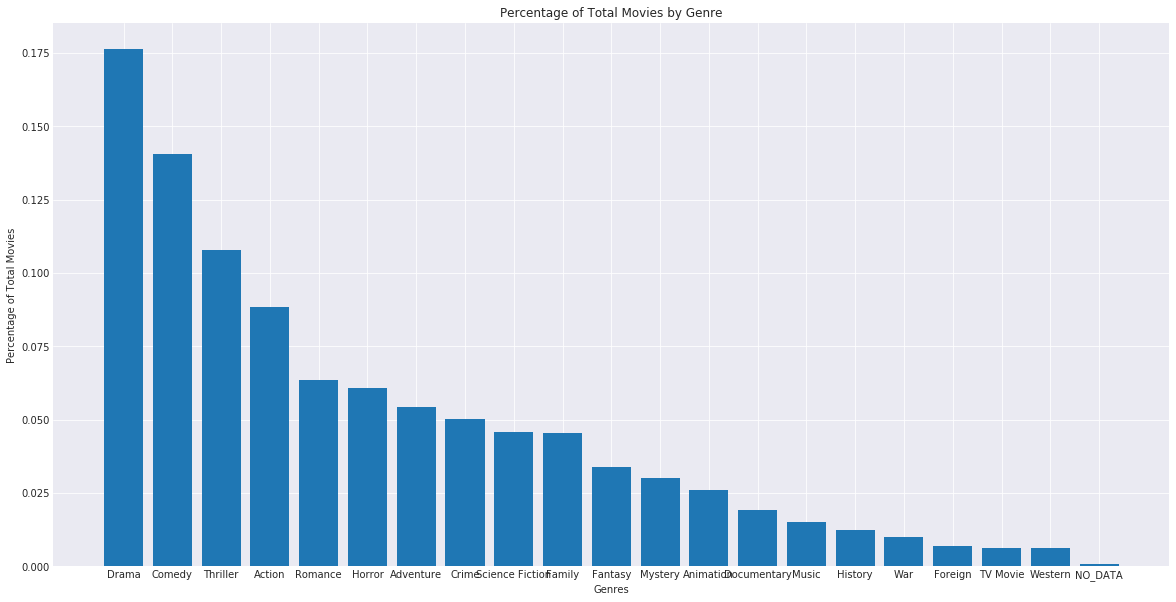

In [69]:
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of Total Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Percentage of Total Movies');
plt.show()



>**Get the percentage of total revenues by genres**


In [70]:
#Get the percentage of total revenues by genres
grped =pd.DataFrame(df_movie_genres.groupby('genres')['revenue_adj'].sum())
grped['tot_rev'] =  grped['revenue_adj'].sum()
grped['pct_of_tot_rev'] = grped['revenue_adj'] / grped['revenue_adj'].sum()
sorted=grped.sort_values('pct_of_tot_rev',ascending=False).reset_index()

values=sorted.loc[:,'pct_of_tot_rev'].values
names=sorted.loc[:,'genres'].values


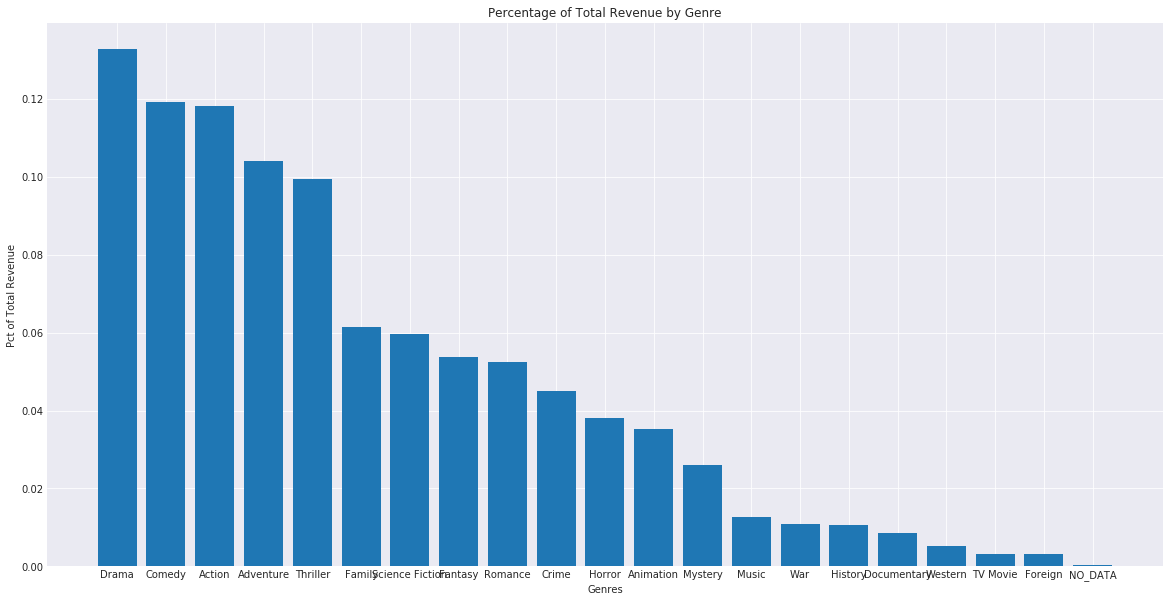

In [71]:
sns.set_style("darkgrid")
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of Total Revenue by Genre')
plt.xlabel('Genres')
plt.ylabel('Pct of Total Revenue');
plt.show()

>**Get the mean popularity by genre**

In [72]:
#Get the mean popularity by genres
grped =pd.DataFrame(df_movie_genres.groupby('genres')['popularity'].mean())
sorted=grped.sort_values('popularity',ascending=False).reset_index()

values=sorted.loc[:,'popularity'].values
names=sorted.loc[:,'genres'].values


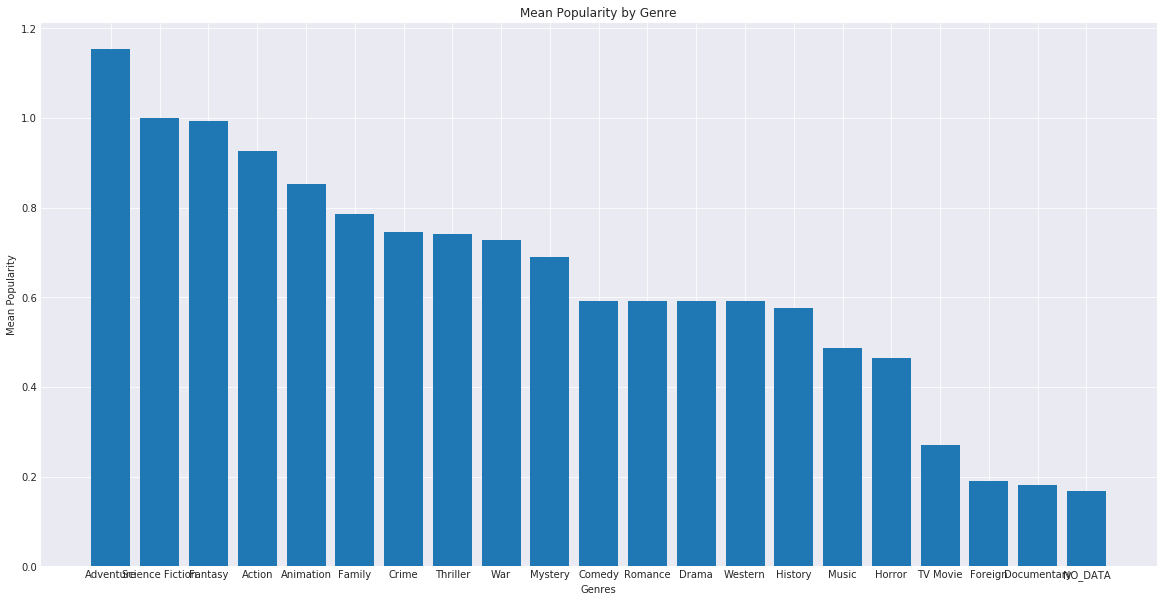

In [73]:
sns.set_style("darkgrid")
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Popularity by Genre')
plt.xlabel('Genres')
plt.ylabel('Mean Popularity');
plt.show()

>**We have a lot of data, lets see how the number of movies within each drama looks, let's cut the data into decades and create a pivot table to make it easier to understand**

In [74]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1950, 1960,  1970,  1980,  1990,  2000, 2010, 2015] # Fill in this list with five values you just found
bin_names = [ '1960', '1970',  '1980',  '1990', '2000', '2010', '2015' ] 
df_movie_genres['decade'] = pd.cut(df_movie_genres['release_year'], bin_edges, labels=bin_names)
grped=pd.DataFrame(df_movie_genres.groupby(['decade','genres'])['id'].count()).reset_index()
sorted=grped.sort_values('decade',ascending=False).reset_index()
sorted.pivot_table('id', index='genres', columns='decade')



decade,1960,1970,1980,1990,2000,2010,2015
genres,,,,,,,
Action,8.0,81.0,137.0,284.0,463.0,843.0,571.0
Adventure,5.0,65.0,85.0,184.0,280.0,537.0,315.0
Animation,NaN,18.0,15.0,42.0,102.0,319.0,203.0
Comedy,8.0,117.0,135.0,451.0,786.0,1426.0,870.0
Crime,2.0,45.0,88.0,174.0,271.0,488.0,289.0
Documentary,NaN,5.0,10.0,14.0,25.0,176.0,290.0
Drama,13.0,174.0,252.0,451.0,903.0,1727.0,1243.0
Family,3.0,39.0,40.0,113.0,295.0,492.0,249.0
Fantasy,2.0,24.0,34.0,129.0,196.0,343.0,188.0


>** Get the pecentages of movies made by genre, let's focus on thise that generated high revenues.  Let's limit it to those with total adjusted revenues greater than $250MM **

In [75]:
#Get the pecentages of movies made by genre
df_movie_genres_bb=pd.DataFrame(df_movie_genres.query('revenue_adj > 250000000'))
grped =pd.DataFrame(df_movie_genres_bb['id'].groupby(df_movie_genres_bb['genres']).size())
grped['pct_of_tot'] = grped['id'] / grped['id'].sum()
sorted=grped.sort_values('pct_of_tot',ascending=False).reset_index()
sorted
values=sorted.loc[:,'id'].values
names=sorted.loc[:,'genres'].values
sorted
#------------------

,genres,id,pct_of_tot
0,Action,281,0.147352
1,Adventure,265,0.138962
2,Drama,196,0.102779
3,Comedy,189,0.099109
4,Thriller,187,0.098060
5,Family,135,0.070792
6,Science Fiction,130,0.068170
7,Fantasy,129,0.067646
8,Animation,88,0.046146
9,Romance,84,0.044048


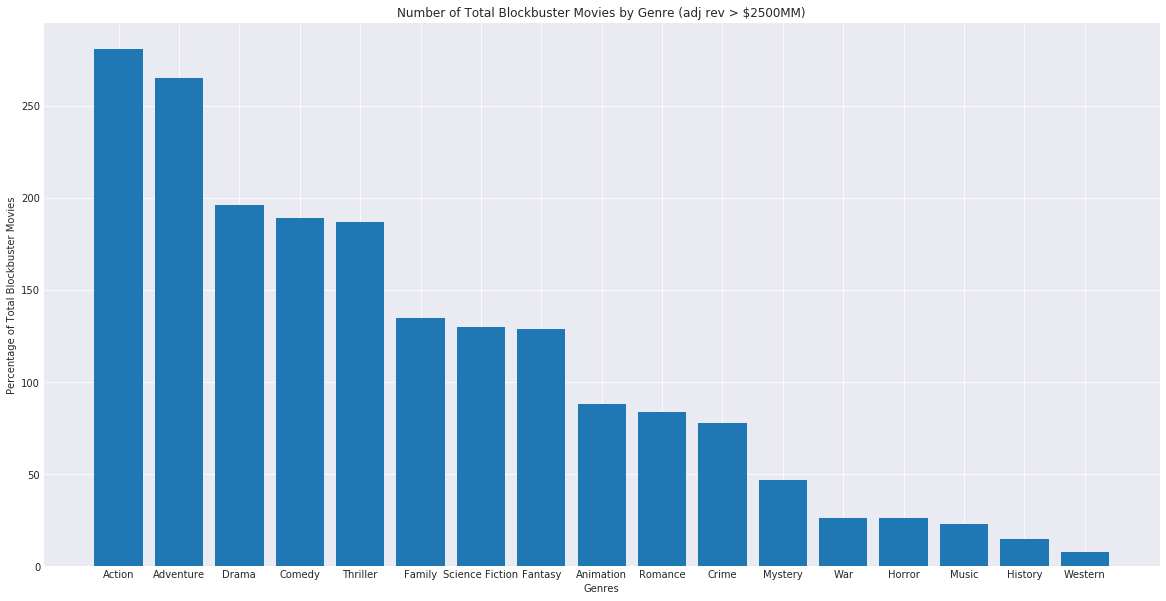

In [76]:
sns.set_style("darkgrid")
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Total Blockbuster Movies by Genre (adj rev > $2500MM)')
plt.xlabel('Genres')
plt.ylabel('Percentage of Total Blockbuster Movies');
plt.show()


In [77]:
#Get the pecentages of movies made by genre
df_movie_genres_bb=pd.DataFrame(df_movie_genres.query('revenue_adj > 500000000'))
grped =pd.DataFrame(df_movie_genres_bb['id'].groupby(df_movie_genres_bb['genres']).size())
grped['pct_of_tot'] = grped['id'] / grped['id'].sum()
sorted=grped.sort_values('pct_of_tot',ascending=False).reset_index()
sorted
values=sorted.loc[:,'id'].values
names=sorted.loc[:,'genres'].values
sorted


,genres,id,pct_of_tot
0,Adventure,133,0.182442
1,Action,113,0.155007
2,Family,65,0.089163
3,Fantasy,63,0.086420
4,Thriller,58,0.079561
5,Comedy,57,0.078189
6,Drama,56,0.076818
7,Science Fiction,55,0.075446
8,Animation,42,0.057613
9,Romance,27,0.037037


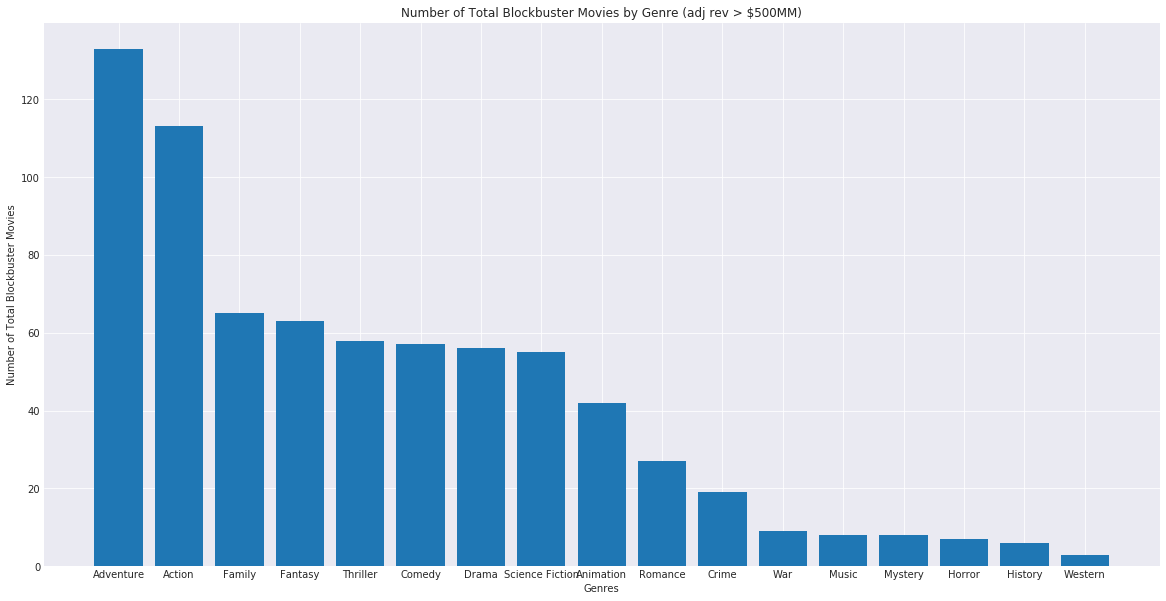

In [78]:
sns.set_style("darkgrid")
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Total Blockbuster Movies by Genre (adj rev > $500MM)')
plt.xlabel('Genres')
plt.ylabel('Number of Total Blockbuster Movies');
plt.show()

>**Now that we have looked at some general aspects of our data, lets try to answer the questions we posed earlier:**

<a id='Q1'></a>
### Q1: Which genres are most popular from year to year?

>** We have over 20 unique genres spanning over 50 years.  In order look at all that data and be able to understand it, we will cut the data into decades again, and inspect the popularity by genre over the decades** 

In [79]:
#------------------
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1950, 1960,  1970,  1980,  1990,  2000, 2010, 2015] # Fill in this list with five values you just found
bin_names = [ '1960', '1970',  '1980',  '1990', '2000', '2010', '2015' ] 
df_movie_genres['decade'] = pd.cut(df_movie_genres['release_year'], bin_edges, labels=bin_names)
grped=pd.DataFrame(df_movie_genres.groupby(['decade','genres'])['popularity'].mean()).reset_index()
grped = grped[['popularity', 'decade', 'genres']]
sorted=grped.sort_values('decade',ascending=False)
sorted
df=sorted
df[['decade','popularity']] = df[['decade','popularity']].apply(pd.to_numeric)

df.head()

,popularity,decade,genres
141,1.616852,2015,Western
130,0.120867,2015,Foreign
140,1.049920,2015,War
121,1.424935,2015,Action
122,1.958744,2015,Adventure


>**Now let's chart the data so we can see how the genres changed**

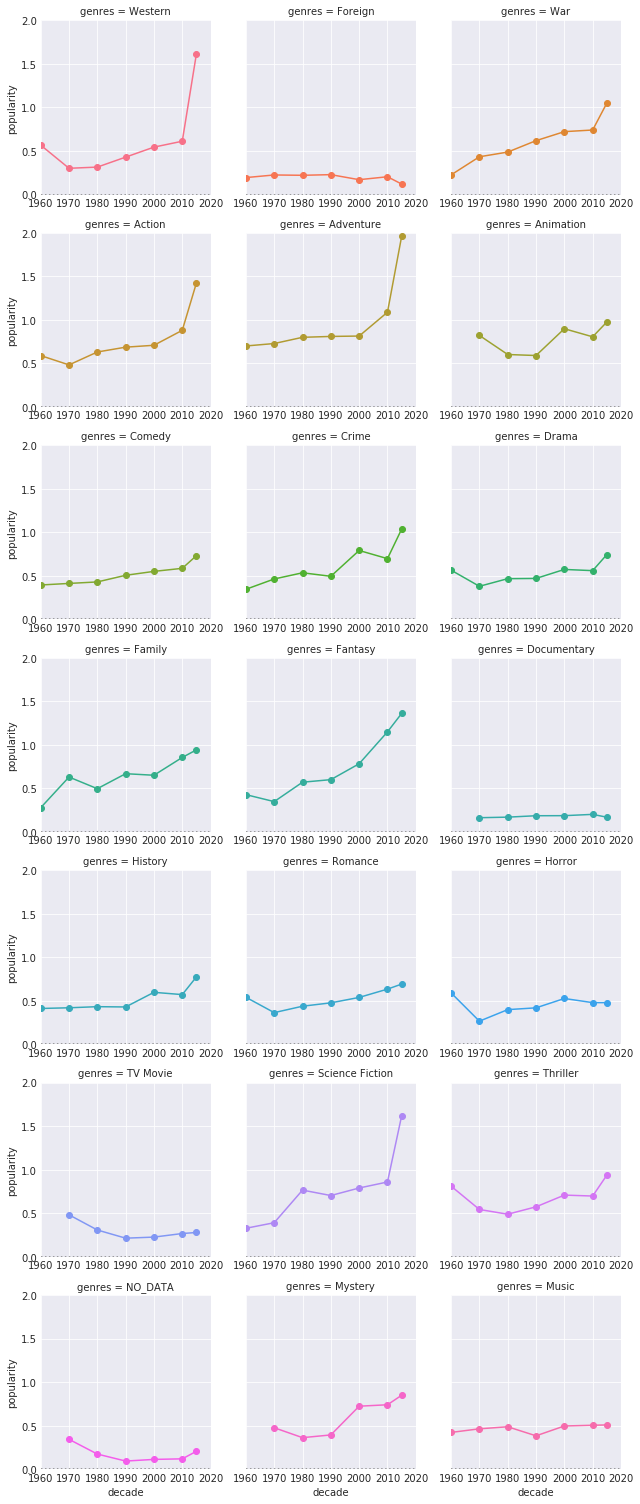

In [80]:
#plt.close('all')
sns.set_style("darkgrid")

# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="genres", hue="genres", col_wrap=3,size=3.0,sharex=False, sharey=True)
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 'decade', 'popularity', marker="o", ms=6)

grid.set(xticks=[1960,1970,1980,1990,2000,2010,2020], yticks=[0, .5, 1.0, 1.5, 2],xlim=(1960, 2020), ylim=(0, 2))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()


<a id='Q2'></a>
### Q2: What kinds of properties are associated with movies that have high revenues?

>**To help better answer my questions I want to add a couple of extra columns.  I am going to add a column for gross profit based on the difference between adjusted budget and adjusted revenues.  I also created a boolean column for movies that made a profit**

In [81]:
#lets add a column for profit
df_mov['gross_profit'] = df_mov['revenue_adj']-df_mov['budget_adj']
#set any negative profi to zero to prevent math error
df_mov.loc[df_mov['gross_profit'] < 0, 'gross_profit'] = 0

#lets add a boolen column to filter movies that made a profit
df_mov['made_profit'] = df_mov['gross_profit'] > 0
#------------------

>**I am going to add a column for the month in which a movie was released to see if the release month has any relationship on revenues.  In order to do that I strip the month from the release_date column**

In [82]:
for index_val, series_val in df_mov['release_date'].iteritems():
    dateobj=datetime.strptime(str(series_val), '%m/%d/%y')
    df_mov.at[index_val, 'release_month'] = int(dateobj.month)

>**Let's use head to inspect the new columns, gross_profit, release_month, and made_profit**

In [83]:
df_mov.head(5)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,made_profit,release_month
0,135397,32.985763,Jurassic World,124.0,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,True,6.0
1,76341,28.419936,Mad Max: Fury Road,120.0,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,True,5.0
2,262500,13.112507,Insurgent,119.0,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,True,3.0
3,140607,11.173104,Star Wars: The Force Awakens,136.0,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,True,12.0
4,168259,9.335014,Furious 7,137.0,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,True,4.0


>**Let's create a subset of the dataframe to use in our statistics**

In [84]:
df=df_mov.loc[:,['popularity','runtime','vote_count','vote_average', 'release_month','release_year', 'budget_adj', 'revenue_adj']]
df.head()

,popularity,runtime,vote_count,vote_average,release_month,release_year,budget_adj,revenue_adj
0,32.985763,124.0,5562,6.5,6.0,2015,1.379999e+08,1.392446e+09
1,28.419936,120.0,6185,7.1,5.0,2015,1.379999e+08,3.481613e+08
2,13.112507,119.0,2480,6.3,3.0,2015,1.012000e+08,2.716190e+08
3,11.173104,136.0,5292,7.5,12.0,2015,1.839999e+08,1.902723e+09
4,9.335014,137.0,2947,7.3,4.0,2015,1.747999e+08,1.385749e+09


>**Let's start by creating a pair plot and inspecting the scatter plots for relationships**

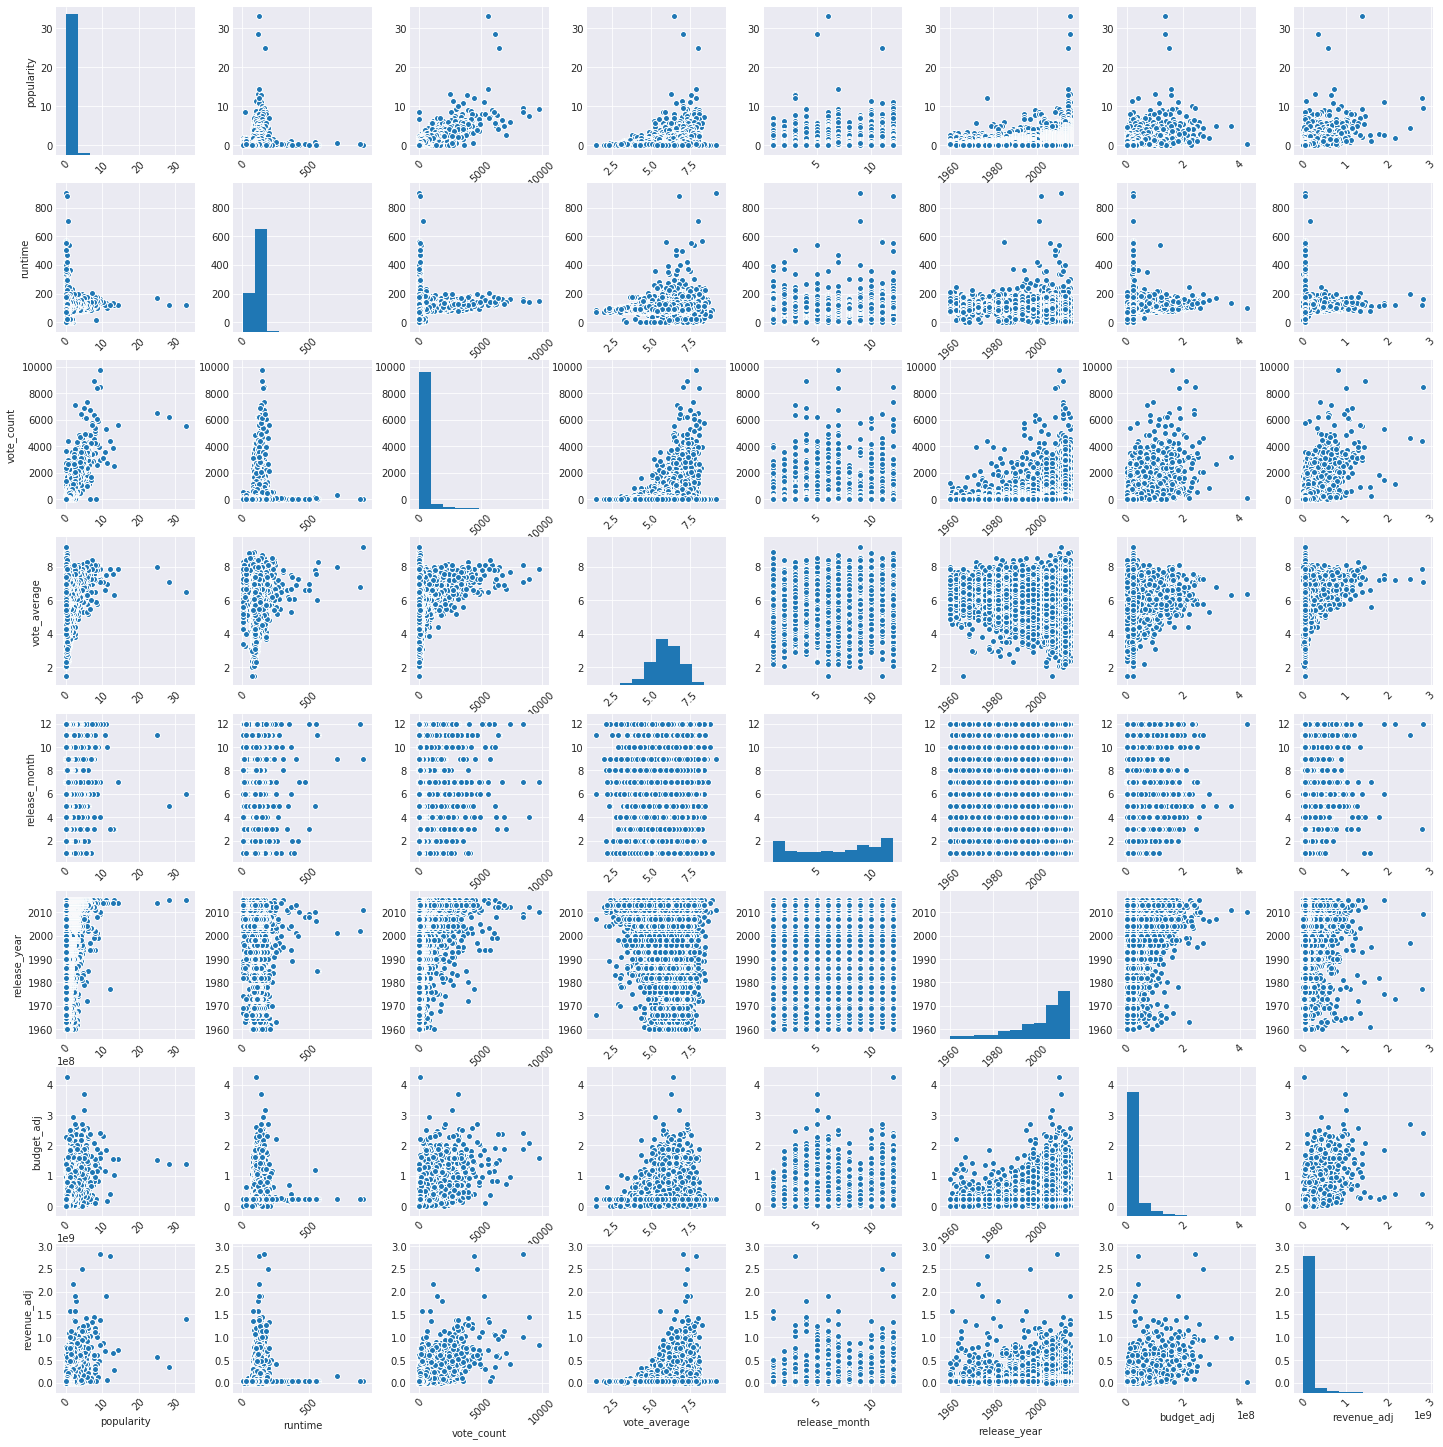

In [85]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

sns.set_style("darkgrid")
g = sns.pairplot(df, diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)


>**Thats a lot of information, its also hard to read. Let's create some individual charts, lets do a scatter of budget vs revenue, bubble profit**

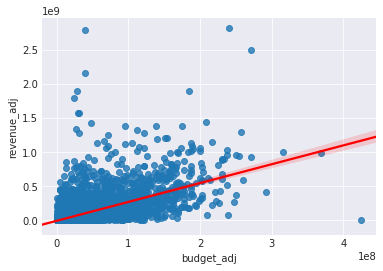

In [86]:
x=pd.DataFrame(df_mov['budget_adj'])
y=pd.DataFrame(df_mov['revenue_adj'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='budget_adj', y="revenue_adj", data=cdf, line_kws={'color': 'red'})


>**We've included a trend line in the scatter plot.  It appears that as budget increase so do gross revenues**

>**Let's compute the correlection coefficient:**

In [87]:
df_mov['budget_adj'].corr(df_mov['revenue_adj'])

0.5996521730979999

>**Let's use the gross proft column as a third dimension and do another scatter of budget vs revenue, this one will be a "bubble chart" using gross rofit for the size dimension **

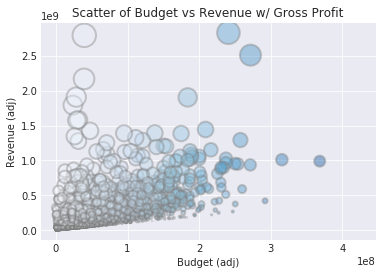

In [132]:
sns.set_style("darkgrid")
x=pd.DataFrame(df_mov['budget_adj']).values.tolist()
y=pd.DataFrame(df_mov['revenue_adj']).values.tolist()
z=pd.DataFrame(df_mov['gross_profit']/5000000.0).values.tolist()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.xlabel("Budget (adj)")
plt.ylabel("Revenue (adj)")
plt.title("Scatter of Budget vs Revenue w/ Gross Profit")
 
plt.show()


>**We've included a trend line in the scatter plot.  It appears that as budget increase so do gross revenues as well as profit.  Bigger budgets, bigger revenues, greater profits...perhaps having more money allows you to produce better movies?**

>**I like longer movies, lets see if there is a relationship between runtime and revenues.  There does appear to be a correlation.  Perhaps making a longer movies allows you to tell the story better resulting in a better movies?**

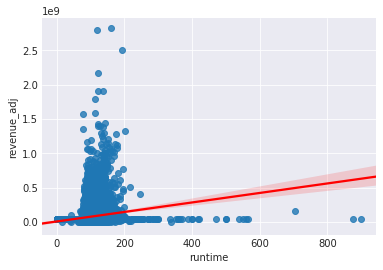

In [133]:
x=pd.DataFrame(df_mov['runtime'])
y=pd.DataFrame(df_mov['revenue_adj'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='runtime', y="revenue_adj", data=cdf, line_kws={'color': 'red'})

In [134]:
df_mov['runtime'].corr(df_mov['revenue_adj'])

0.15807001298388015

>**Below we see the relationship between popularity and revenues.  But which variable is really dependent on the other? Since popularity is based on a formula that includes website interaction how do know if popular movies drive more website interaction or if web site activity drives more people to see the movie?**

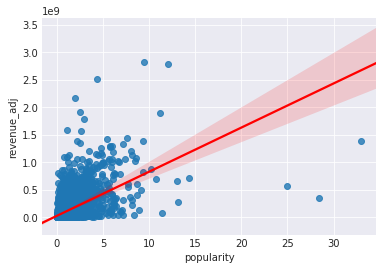

In [135]:
x=pd.DataFrame(df_mov['popularity'])
y=pd.DataFrame(df_mov['revenue_adj'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='popularity', y="revenue_adj", data=cdf, line_kws={'color': 'red'})

In [136]:
df_mov['popularity'].corr(df_mov['revenue_adj'])

0.58398124590542799

>**Below we see the relationship between vote count and revenues, the feature shares the concerns expressed above regarding popularity.**

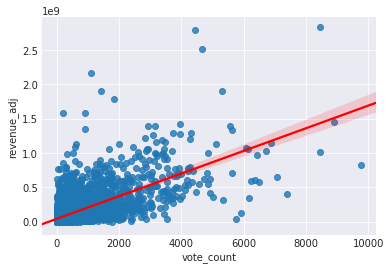

In [137]:
x=pd.DataFrame(df_mov['vote_count'])
y=pd.DataFrame(df_mov['revenue_adj'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='vote_count', y="revenue_adj", data=cdf, line_kws={'color': 'red'})

In [138]:
df_mov['vote_count'].corr(df_mov['revenue_adj'])

0.69062327641850607

>**Below we see the relationship between vote average and revenues, there doesnt appear to be much of a correlation, if so it is slight, the slope of the trendline is relatively flat.**

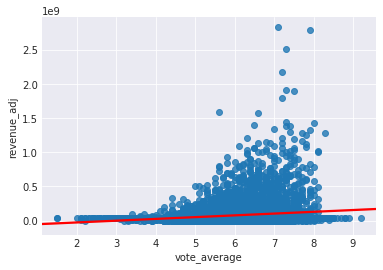

In [139]:
x=pd.DataFrame(df_mov['vote_average'])
y=pd.DataFrame(df_mov['revenue_adj'])
cdf = pd.concat([x, y], axis=1) 
ax = sns.regplot(x='vote_average', y="revenue_adj", data=cdf, line_kws={'color': 'red'})

In [140]:
df_mov['vote_average'].corr(df_mov['revenue_adj'])

0.17663442695859438

<a id='Q3'></a>
### Q3: Does the release date impact movie revenues?

>**We created a column for the month by extracting the month from the release date we will use the new month column to see if there is a difference in the revenue based on when movies are released**

In [141]:
df=df_mov.groupby('release_month')['revenue_adj'].sum().reset_index()
df

,release_month,revenue_adj
0,1.0,4.451831e+10
1,2.0,3.961765e+10
2,3.0,6.050418e+10
3,4.0,5.150908e+10
4,5.0,8.096753e+10
5,6.0,9.903098e+10
6,7.0,7.679028e+10
7,8.0,5.395258e+10
8,9.0,6.267350e+10
9,10.0,6.906264e+10


In [103]:
names=['Jan','Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec']
values=df.loc[:,'revenue_adj'].values
values

array([  4.45183115e+10,   3.96176521e+10,   6.05041848e+10,
         5.15090818e+10,   8.09675307e+10,   9.90309846e+10,
         7.67902770e+10,   5.39525808e+10,   6.26735026e+10,
         6.90626440e+10,   7.83533012e+10,   1.05412873e+11])

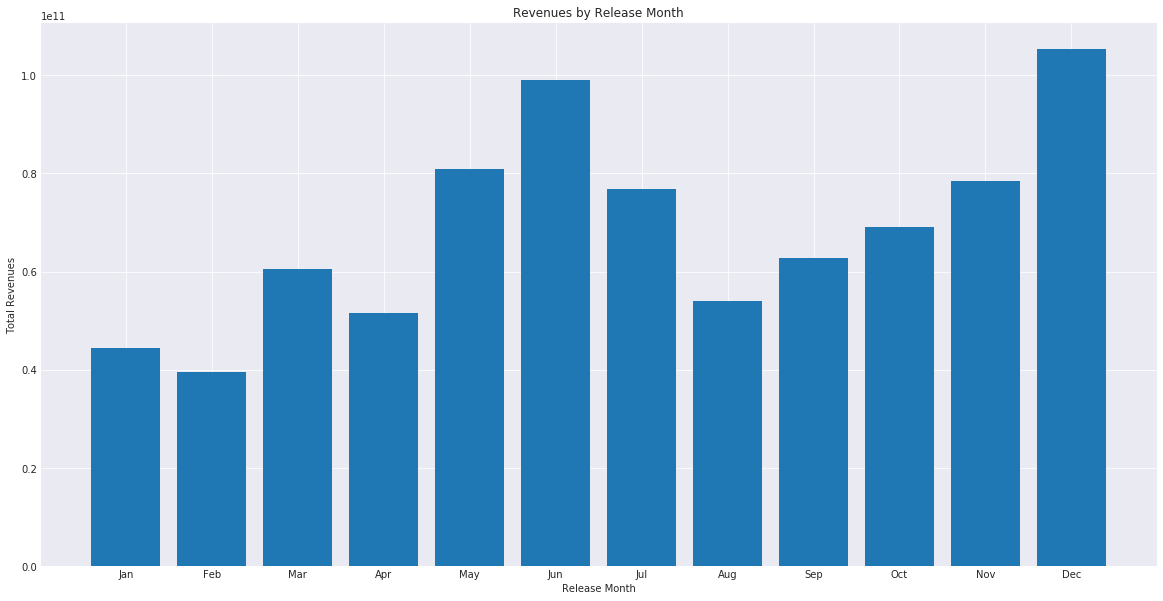

In [104]:
sns.set_style("darkgrid")
locations = range(len(names))
heights = values
labels = names
plt.figure(figsize=(20, 10))
plt.bar(locations, heights, tick_label=labels)
plt.title('Revenues by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Total Revenues');
plt.show()

>**It appears that movies releases in Jun and December generate the most revenues.  Intuitively this aligns with summer and holiday movie seasons**

<a id='trivia'></a>
## Fun Trivia

<a id='F1'></a>
### Which actors have appeared in the most blockbuster films?

>**Lets merge the cast data to answer this question, first we'll check the shape and size. Then we'll group the data and finally we'll plot the data.  We will limit our results to the top 25 rows.**

In [105]:
#-------------------
df_cast = pd.read_csv('cast_dataset.csv', encoding='latin-1')
# merge datasets
df_movie_cast = pd.merge(df_mov, df_cast, how='inner', left_on='id', right_on= 'id')

In [106]:
df_movie_cast.shape

(50646, 14)

In [107]:
df_movie_cast.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'gross_profit', 'made_profit', 'release_month', 'cast'],
      dtype='object')

In [108]:
df_blockbusters=df_movie_cast.query('revenue_adj > 250000000')
grped=pd.DataFrame(df_blockbusters.groupby(['cast'])['id'].count()).reset_index()
sorted=grped.sort_values('id',ascending=False)
x=sorted.iloc[:25]


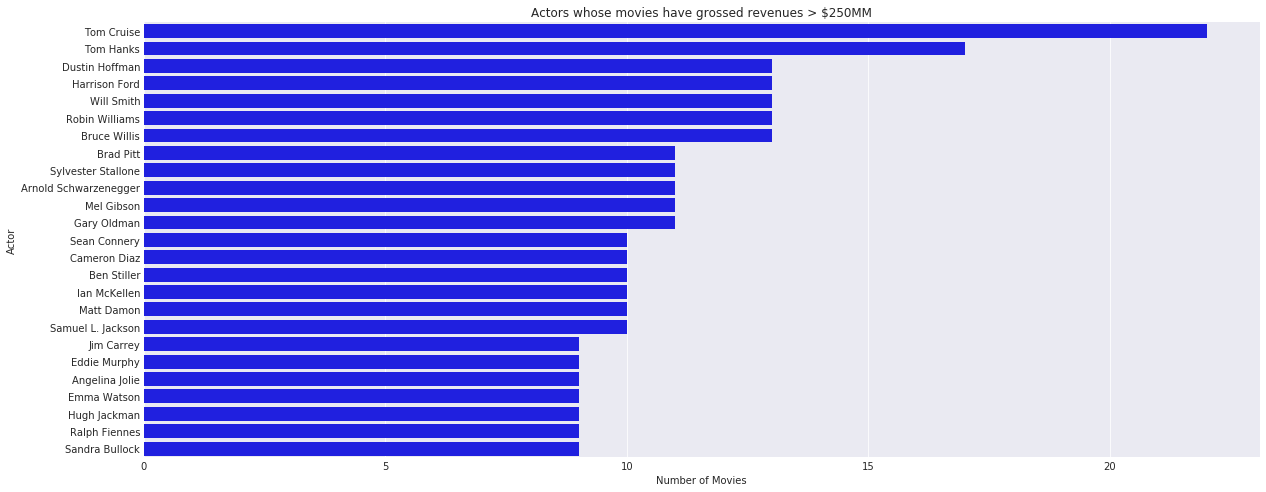

In [109]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
ax= sns.barplot(x="id", y="cast", data=x, label="Actors", color="b", orient="h");
ax.set_xlabel("Number of Movies")
ax.set_ylabel("Actor")
ax.set_title("Actors whose movies have grossed revenues > $250MM");

<a id='F2'></a>
### Which actors have have generated the highest revenues?

>**We'll group the data and finally we'll plot the data.  We will limit our results to the top 25 rows.**

In [110]:
grped=pd.DataFrame(df_movie_cast.groupby(['cast'])['revenue_adj'].sum()).reset_index()
sorted=grped.sort_values('revenue_adj',ascending=False)
sorted.head(25)
x=sorted.iloc[:25]


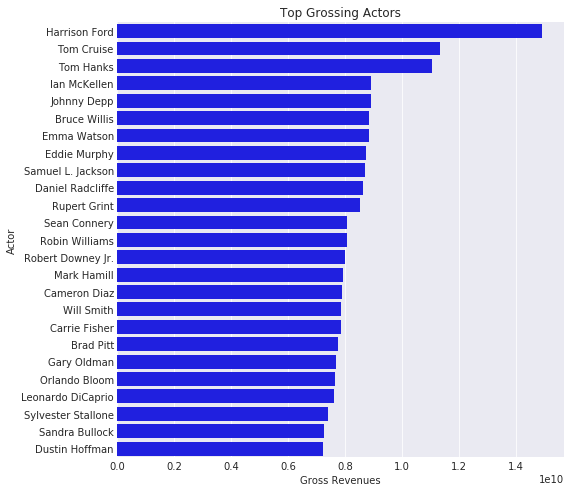

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax=sns.barplot(x="revenue_adj", y="cast", data=x, label="Actors", color="b");

ax.set_xlabel("Gross Revenues")
ax.set_ylabel("Actor")
ax.set_title("Top Grossing Actors");


<a id='F3'></a>
### Which directors movies have generated the highest revenues?

>**Lets merge the director data to answer this question, first we'll check the shape and size. Then we'll group the data and finally we'll plot the data.  We will limit our results to the top 25 rows.**

In [112]:
#-------------------
df_direct = pd.read_csv('direct_dataset.csv', encoding='latin-1')
# merge datasets
df_movie_direct = pd.merge(df_mov, df_direct, how='inner', left_on='id', right_on= 'id')

In [113]:
df_movie_direct.shape

(11852, 14)

In [114]:
df_movie_direct.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'gross_profit', 'made_profit', 'release_month',
       'director'],
      dtype='object')

In [115]:
grped=pd.DataFrame(df_movie_direct.groupby(['director'])['revenue_adj'].sum()).reset_index()
sorted=grped.sort_values('revenue_adj',ascending=False)
x=sorted.iloc[:25]


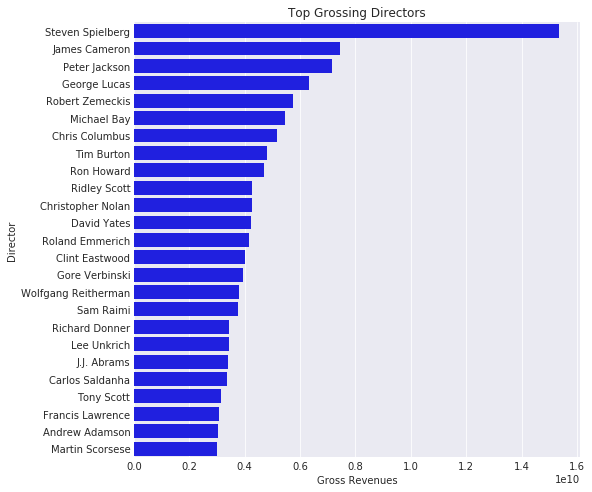

In [116]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 8)
ax=sns.barplot(x="revenue_adj", y="director", data=x,label="Directors", color="b");
ax.set_xlabel("Gross Revenues")
ax.set_ylabel("Director")
ax.set_title("Top Grossing Directors");

<a id='F4'></a>
### Which production companies have have generated the highest revenues?

>**Lets merge the production company data to answer this question, first we'll check the shape and size. Then we'll group the data and finally we'll plot the data.  We will limit our results to the top 25 rows.**

In [117]:
#-------------------
df_prodco = pd.read_csv('prodco_dataset.csv', encoding='latin-1')
# merge datasets
df_movie_prodco = pd.merge(df_mov, df_prodco, how='inner', left_on='id', right_on= 'id')

In [118]:
df_movie_prodco.shape

(23780, 14)

In [119]:
df_movie_prodco.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'gross_profit', 'made_profit', 'release_month',
       'production_companies'],
      dtype='object')

In [120]:
grped=pd.DataFrame(df_movie_prodco.groupby(['production_companies'])['revenue_adj'].sum()).reset_index()
sorted=grped.sort_values('revenue_adj',ascending=False)
x=sorted.iloc[:25]


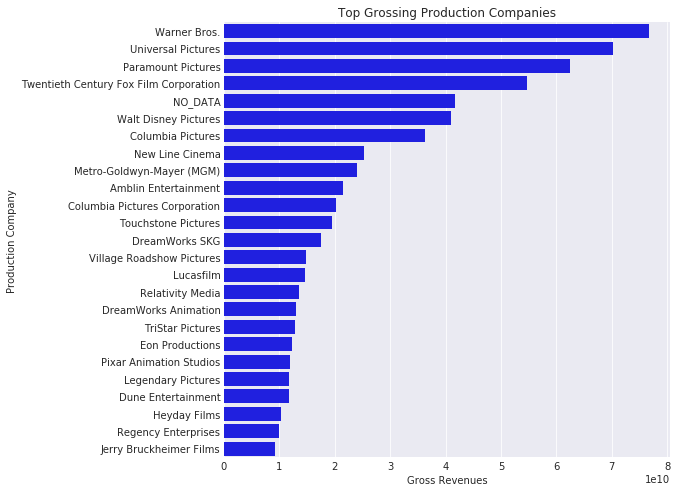

In [121]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 8)
ax=sns.barplot(x="revenue_adj", y="production_companies", data=x,label="Production Companies", color="b");
ax.set_xlabel("Gross Revenues")
ax.set_ylabel("Production Company")
ax.set_title("Top Grossing Production Companies");

<a id='conclusions'></a>
## Conclusions

>**Q1: Which genres are most popular from year to year?  Action and Adventure movies rank as the most popular genres.  Westerns have been a perennial favorite.  The Fantasy and Science Fiction genres have been increasing in popularity since the 1970s.  Foreign Film and Documentaries have been relatively flat, and during some periods decreasing in popularity**  

>**Q2: What kinds of properties are associated with movies that have high revenues?  It appears that as budget increase so do gross revenues, the correlation coefficient is .599 which indicates correlation.  Movie runtime does not appear to be strongly correlated with revenues, the correlation coefficient is .158, this value indicates there is a positive relationship between the two variables, but it is weak.  There is a strong correlation between popularity and high revenues, the correlation coefficient is .584 but which variable is really dependent on the other? Since popularity is based on a formula that includes website interaction how do know if popular movies drive more website interaction or if web site activity drives more people to see the movie?  There is an even stronger correlation of .690 between movie votes and revenues but if suffers from the same concerns as noted with popularity.  Vote average does not appear to be correlated with high revenues, the correlation coefficient is .177, this value indicates there is a positive relationship between the two variables, but it is weak. Several genre woudl appear to be related to with higer revenues, Adventure, Action, Family and Fantasy are among the hihgest in popuarity and have account for many blockbusters.  Since the genrea a categorical somd type of ANOVA test would be the best way to prove it statistcally. But this would be made diffcult by the fact that some movies fall into several genres and violates one of the basic assumptions of ANOVA testing which assumes an observation lies in only one group.** 

>**Q3: Does the release date impact movie revenues?  It appears that there is a relationship between the month in which a movie is released and high revenues.  Movies releases in Jun and December generate the most revenues.  Intuitively this aligns with summer and holiday movie seasons**

>**<u>Limitations of the data and the analysis:</u> As noted earlier the genre are categorical and some type of ANOVA test would typically be one of the best ways to show a relationship statistically given categories. But this would be made difficult by the fact that the data fails some of the basic assumptions needed for ANOVA testing.  For example, there is an obvious lack of independence between samples as some movies fall into several genres and this violates one of the basic assumptions of ANOVA testing which assumes an observation lies in only one group.  Another problem with the data is that it suffers from non-normality of both dependent and independent variables related to revenues, and they contain a lot outliers.  As noted above with respect to runtime data some of the observations would appear to be completely in error.  Many of the records have values which are 0 and are effectively missing.  In my analysis I chose to impute with the median rather than delete over 50% of the data.  Other perhaps more effecting methods of imputing the data do exist such regression substitution which tries to predict the missing value from the other values, or sophisticated multiple imputation techniques in which correlations between observations are used.  These options are limited because the data does not provide enough additional fields of information to do so effectively.  These methods are also beyond the scope of what has been covered in the course this far.   Another problem with the data is that it appears to be biased toward more recent observations, there is more data related to more recent movies as opposed to older movies.  Another issue with the data is its accuracy.  How confident are we in the accuracy of the information?  I attempted to spot check some of the budget and revenue values against other sources and noted discrepancies.  The data is also limited to 2015, so any assertions made would not take into account any recent changes or impacts.  Also it appears that popularity, votes and vote averages are derived from some form of website user interaction and therefore again biased toward more recent movies.  As I also pointed out above, external factors related to a movie are likely driving site user interaction resulting in correlations though movie popularity and votes aren’t like “driving” revenues, it’s more likely that popular moves drive site interactions.  In short, the biggest limitation is that the data set isn’t likely a “good” sample in that it doesn’t cover the entire domain, has significant missing values, lacks additional key fields that would improve its usability and effectiveness and it appears to be inherently biased or would lead to biased results.  The analysis is only as good as the data.**



<a id='references'></a>
## References

>No code was copied verbatim, however teh follow books and websites were used for examples and insights
  
>**Books:**  
>   Python Data Science Handbook by Jake VanderPlas  
>   Mastering Regular Expressions by Jeffrey E.P. Friedl 
      
>**Websites:**  
    https://pandas.pydata.org/pandas-docs/stable/visualization.html   
    https://elitedatascience.com/python-seaborn-tutorial  
    https://stackoverflow.com/questions/44552489/plotting-multiple-boxplots-in-seaborn  
    https://measuringu.com/handle-missing-data/  
    https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf  
    https://en.m.wikipedia.org/wiki/Imputation_(statistics)  
    https://en.m.wikipedia.org/wiki/Missing_data  
    https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html  
    https://eazybi.com/blog/data_visualization_and_chart_types/  
    https://pandas.pydata.org/pandas-docs/stable/groupby.html  
    https://stackoverflow.com/questions/38651008/splitting-multiple-columns-into-rows-in-pandas-dataframe 